In [1]:
''' This is a notbook for kaggle competition to predict Store sales'''

' This is a notbook for kaggle competition to predict Store sales'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10000
pd.options.display.min_rows = 1000

In [3]:
#import train data
df_train = pd.read_csv("../data/store-sales-time-series-forecasting/train.csv")
df_holidays = pd.read_csv("../data/store-sales-time-series-forecasting/holidays_events.csv")
df_oil = pd.read_csv("../data/store-sales-time-series-forecasting/oil.csv")
df_stores = pd.read_csv("../data/store-sales-time-series-forecasting/stores.csv")
df_test = pd.read_csv("../data/store-sales-time-series-forecasting/test.csv")
df_transactions = pd.read_csv("../data/store-sales-time-series-forecasting/transactions.csv")
df_sample_sub = pd.read_csv("../data/store-sales-time-series-forecasting/sample_submission.csv")

In [4]:
df_merged = pd.read_csv("../data/store-sales-time-series-forecasting/preprocessed_train_data.csv")

C:\Users\sadha\AppData\Local\Temp\ipykernel_32756\3974130489.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv("../data/store-sales-time-series-forecasting/preprocessed_train_data.csv")


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [7]:
#checking for na data
nulldata=df_train.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_train)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: id, # of Nulls: 0 , NA Percentage: 0.0
Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: family, # of Nulls: 0 , NA Percentage: 0.0
Column: sales, # of Nulls: 0 , NA Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , NA Percentage: 0.0


# Train dataset desctiption:
# 1. The dataset looks clean with no nulls or nas in any of the columns in the train dataset.
# 2. Time series of features store_nbr, family, and onpromotion as well as the target sales.
# 3. store_nbr identifies the store at which the products are sold.
# 4. family identifies the type of product sold.
# 5. sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
# 6. onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [8]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [9]:
nulldata=df_holidays.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_holidays)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: locale, # of Nulls: 0 , NA Percentage: 0.0
Column: locale_name, # of Nulls: 0 , NA Percentage: 0.0
Column: description, # of Nulls: 0 , NA Percentage: 0.0
Column: transferred, # of Nulls: 0 , NA Percentage: 0.0


In [10]:
df_holidays["type"].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

# Different values of holidays described below
# Holiday - A holiday
# Event - An event
# Additional - Days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
# Transfer - A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer
# Bridge - Extra days that are added to a holiday (e.g., to extend the break across a long weekend)
# Work Day - The Bridge types are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

# Some more information
# 1. Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
# 2. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
# 3. No nul values in the dataset.

In [11]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [12]:
nulldata=df_oil.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_oil)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: dcoilwtico, # of Nulls: 43 , NA Percentage: 3.5303776683087027


# Oil.csv data description:
# 1. There are 43 null valus in dcoilwtico column in oil dataset
# 2. It contains daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [13]:
print(df_stores)

    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga                        Cotopaxi    C       15
12         13      Latacu

In [14]:
nulldata=df_stores.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_stores)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: city, # of Nulls: 0 , NA Percentage: 0.0
Column: state, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: cluster, # of Nulls: 0 , NA Percentage: 0.0


# Stores data description
## 1. No nulls in the stores dataset
## 2. Store metadata, including city, state, type, and cluster.
## 3. cluster is a grouping of similar stores.

# Exploring transactions data. - This dataset contains the number of transactions at store level.

In [15]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [16]:
nulldata=df_transactions.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_transactions)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: transactions, # of Nulls: 0 , NA Percentage: 0.0


# Observations:
## 1. There are no nulls in the dataset

In [17]:
#Change date from object to date
df_train['date'] = pd.to_datetime(df_train['date'])

In [18]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['dayofweek'] = df_train['date'].dt.weekday

In [19]:
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000000,0,2013,1,1
5,5,2013-01-01,1,BREAD/BAKERY,0.000000,0,2013,1,1
6,6,2013-01-01,1,CELEBRATION,0.000000,0,2013,1,1
7,7,2013-01-01,1,CLEANING,0.000000,0,2013,1,1
8,8,2013-01-01,1,DAIRY,0.000000,0,2013,1,1
9,9,2013-01-01,1,DELI,0.000000,0,2013,1,1


# We also created a standalone script where we merged all the data in a single table. That dataset is df_merged

In [20]:
#Change date from object to date
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month
df_merged['dayofweek'] = df_merged['date'].dt.weekday

In [21]:
#checking for null data
nulldata=df_merged.isnull().sum()
for index, value in nulldata.items():
    per=value/len(df_merged)
    print(f"Column: {index}, # of Nulls: {value} , Null Percentage: {per*100}")

Column: Unnamed: 0, # of Nulls: 0 , Null Percentage: 0.0
Column: id, # of Nulls: 0 , Null Percentage: 0.0
Column: date, # of Nulls: 0 , Null Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , Null Percentage: 0.0
Column: family, # of Nulls: 0 , Null Percentage: 0.0
Column: sales, # of Nulls: 0 , Null Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , Null Percentage: 0.0
Column: holiday_type, # of Nulls: 2724678 , Null Percentage: 90.7957244655582
Column: dcoilwtico, # of Nulls: 928422 , Null Percentage: 30.93824228028503
Column: city, # of Nulls: 0 , Null Percentage: 0.0
Column: state, # of Nulls: 0 , Null Percentage: 0.0
Column: store_type, # of Nulls: 0 , Null Percentage: 0.0
Column: cluster, # of Nulls: 0 , Null Percentage: 0.0
Column: transactions, # of Nulls: 245784 , Null Percentage: 8.190375648807953
Column: year, # of Nulls: 0 , Null Percentage: 0.0
Column: month, # of Nulls: 0 , Null Percentage: 0.0
Column: dayofweek, # of Nulls: 0 , Null Percentage: 0.0


 # Observations
 # 1. Holiday type is null for 90% of the rows which means that 90% of the days are non holiday days.
 # 2. 30% of the rows in oil price is null. 
 # 3. 8 % of the rows in transactions is null.

# We will have to do null imputation in this dataset.

In [22]:
# Holiday type null would mean that it was not a holiday on that date. We can introduce a new category called NA in this case. 

In [23]:
df_merged_nullsimputed = df_merged.copy()

In [24]:
df_merged_nullsimputed.holiday_type.fillna('NA', inplace=True)

C:\Users\sadha\AppData\Local\Temp\ipykernel_32756\2026142985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_nullsimputed.holiday_type.fillna('NA', inplace=True)


In [25]:
# Nulls in oil price value could be because of a non trading day or missing data. I am using forward fill function to use the last day's price of oil.

In [26]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'ffill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_32756\3459459042.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'ffill')


In [27]:
df_merged_nullsimputed[df_merged_nullsimputed['dcoilwtico'].isnull()].date.value_counts()

date
2013-01-01    1782
Name: count, dtype: int64

# This shows that the value of oil price is null for the first date i.e 01/01/2013. We can do a backward fill for these values.

In [28]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'bfill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_32756\649138835.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'bfill')


In [29]:
df_merged_nullsimputed['dcoilwtico'].isnull().sum()

0

# Now there are no nulls in the oil price in merged dataset. We will now impute transactions.
# Null values in transaction would represent either of the below cases:
# 1. Missing data
# 2. Data collection issues
# 3. Store closure
# 4. Zero transactions

In [30]:
df_merged_nullsimputed.transactions.value_counts(ascending=True)

transactions
4392.0      33
5089.0      33
4710.0      33
5951.0      33
5899.0      33
5958.0      33
5343.0      33
5268.0      33
4873.0      33
7045.0      33
5470.0      33
5797.0      33
4752.0      33
6279.0      33
4038.0      33
5178.0      33
5109.0      33
5872.0      33
5461.0      33
5194.0      33
4062.0      33
5793.0      33
5908.0      33
6190.0      33
7334.0      33
6457.0      33
7689.0      33
5757.0      33
6205.0      33
7447.0      33
8120.0      33
6009.0      33
5726.0      33
6415.0      33
6566.0      33
7524.0      33
5722.0      33
5917.0      33
6788.0      33
6198.0      33
7205.0      33
5719.0      33
6521.0      33
5190.0      33
5297.0      33
4985.0      33
4079.0      33
4793.0      33
5945.0      33
5795.0      33
5375.0      33
4531.0      33
4703.0      33
5847.0      33
5378.0      33
4746.0      33
4149.0      33
203.0       33
371.0       33
5050.0      33
4029.0      33
5851.0      33
5490.0      33
4543.0      33
4749.0      33
4945.0      

In [31]:
df_merged_nullsimputed

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
1,1,1,2013-01-01,1,BABY CARE,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
2,2,2,2013-01-01,1,BEAUTY,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
3,3,3,2013-01-01,1,BEVERAGES,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
4,4,4,2013-01-01,1,BOOKS,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
5,5,5,2013-01-01,1,BREAD/BAKERY,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
6,6,6,2013-01-01,1,CELEBRATION,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
7,7,7,2013-01-01,1,CLEANING,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
8,8,8,2013-01-01,1,DAIRY,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
9,9,9,2013-01-01,1,DELI,0.000000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1


# Here we see that the minimum value is 33. Thus, reason could be that there were no transactions in that store for that date.
# We will now create a new feature called isHoliday at date, locale and finaly arrive at a conclusion that is was a holiday in that store or not.
# Basis this we will decide where to impute the number of transactions in that store number as 0 or leave them null. 
# In case the final value needs to be null then we can use regression imputation to set hose as some values. 
# We as of now assume sales will be highly correlated to transactions and our understanding is that sales will anyways cover the number of transactions in itself so we might remove this column from our training set as well.

In [32]:
df_merged_nullsimputed.groupby(['year','month','store_nbr'])['transactions'].sum()

year  month  store_nbr
2013  1      1            1566543.0
             2            1900404.0
             3            3001218.0
             4            1516020.0
             5            1496715.0
             6            1745766.0
             7            1560141.0
             8            2721411.0
             9            2083521.0
             10           1074777.0
             11           2347125.0
             12           1152987.0
             13            904299.0
             14           1570503.0
             15           1285680.0
             16            998877.0
             17           1232946.0
             18           1303104.0
             19           1131702.0
             20                 0.0
             21                 0.0
             22                 0.0
             23           1137180.0
             24           2331681.0
             25            892584.0
             26            805497.0
             27           1120119.0
     

In [33]:
df_merged_nullsimputed.groupby(['store_nbr','year','month'])['transactions'].sum()

store_nbr  year  month
1          2013  1        1566543.0
                 2        1339371.0
                 3        1494867.0
                 4        1542420.0
                 5        1527438.0
                 6        1480908.0
                 7        1579842.0
                 8        1511037.0
                 9        1469820.0
                 10       1531992.0
                 11       1543839.0
                 12       1653630.0
           2014  1        1564761.0
                 2        1446027.0
                 3        1462263.0
                 4        1519155.0
                 5        1558425.0
                 6        1507440.0
                 7        1592349.0
                 8        1520178.0
                 9        1531662.0
                 10       1535655.0
                 11       1420221.0
                 12       1766556.0
           2015  1        1560966.0
                 2        1368609.0
                 3        1577202.0
     

In [34]:
#df_t2=df_t1.reset_index()

In [35]:
#df_t2[df_t2['store_nbr'] == 20]

In [36]:
sales_by_year_dayofweek = df_merged_nullsimputed[df_merged_nullsimputed['year'] == 2016].groupby('dayofweek').sales.sum()

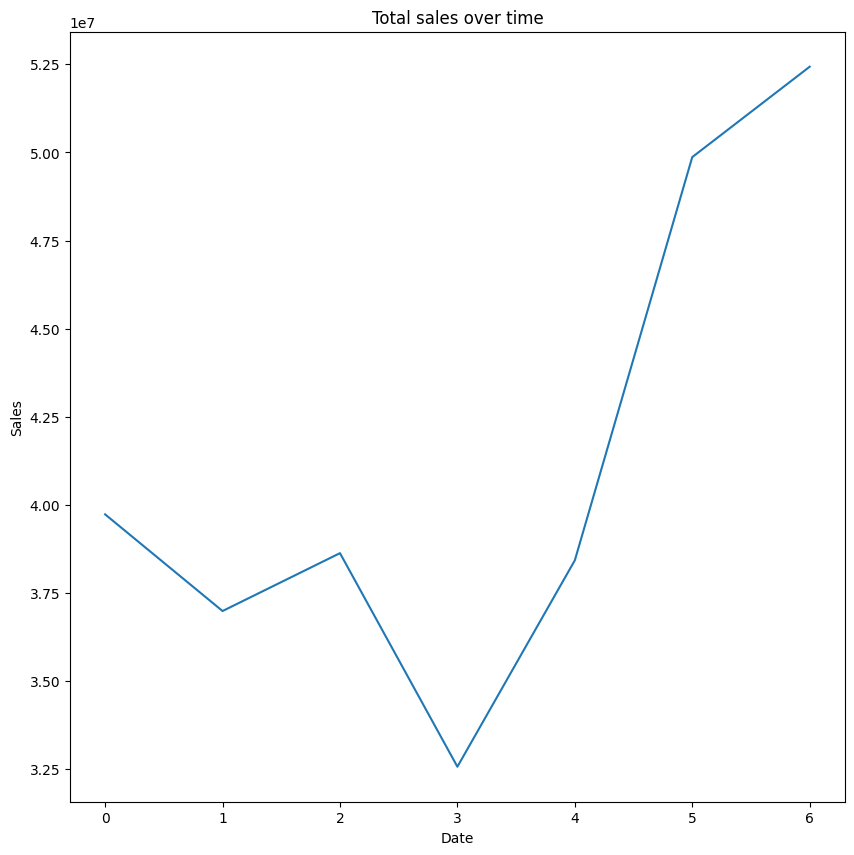

In [37]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_year_dayofweek)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [38]:
sales_by_date = df_merged.groupby('date').sales.sum()

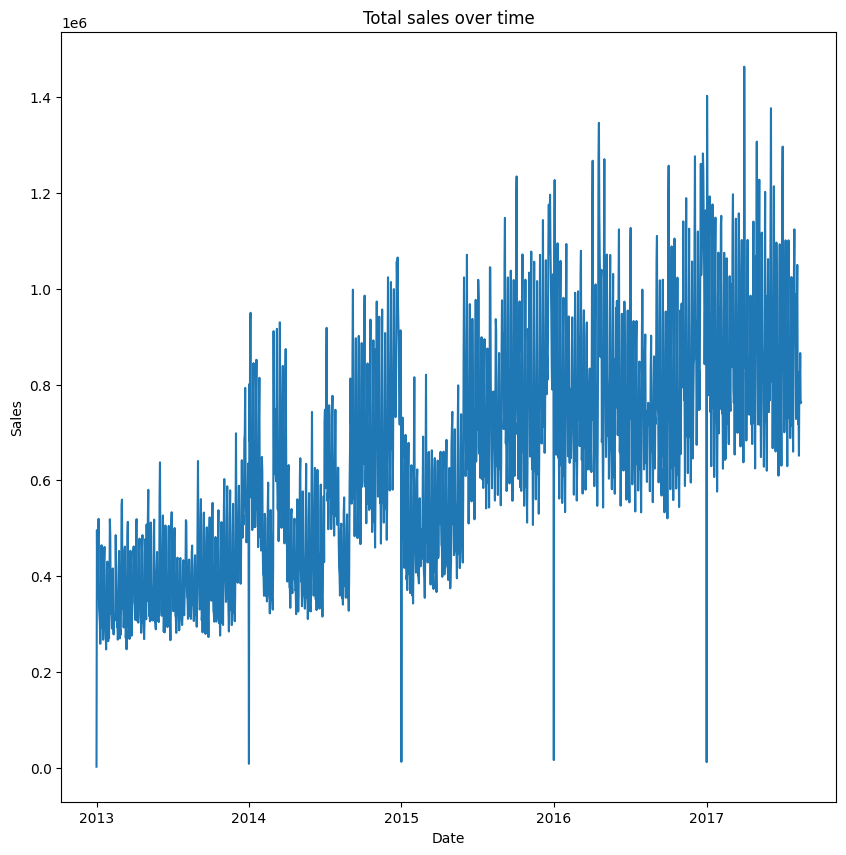

In [39]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_date)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# The above graph shows the Total sales per date and this shows that there is seasonality in data because we see some spikes in the graph on specific dates. We will have to do some Exploratory data analysis to flatten this data and make this data usable for training.

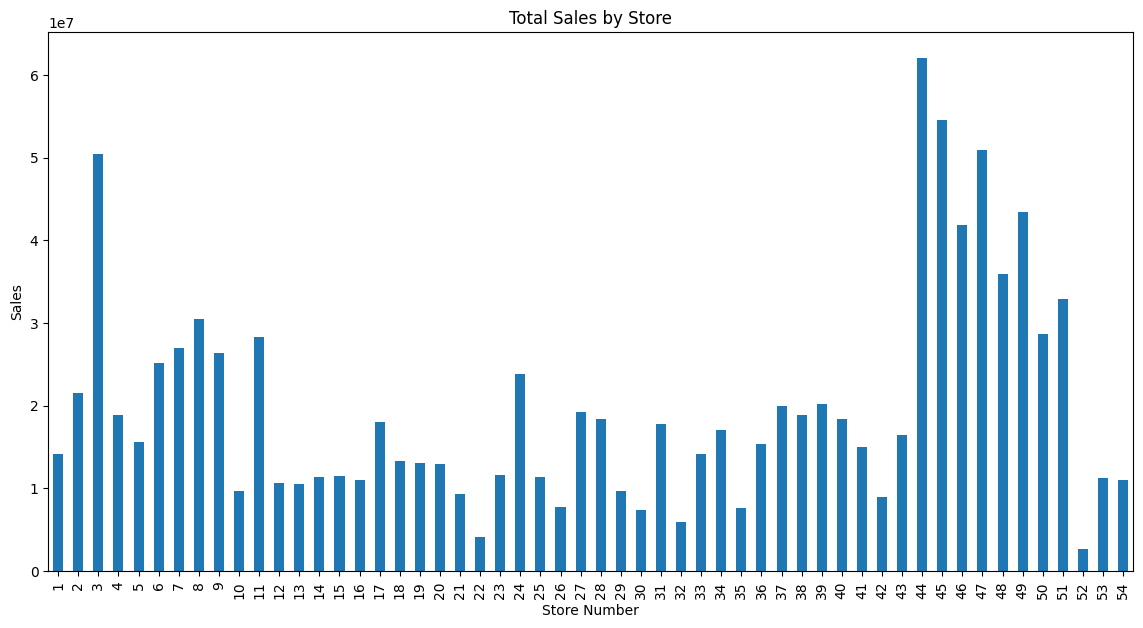

In [40]:
sales_by_store = df_merged.groupby('store_nbr').sales.sum()

plt.figure(figsize=(14, 7))
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

# The above plot shows the store sales per store number . This shows that store # 44 has the highest sales.

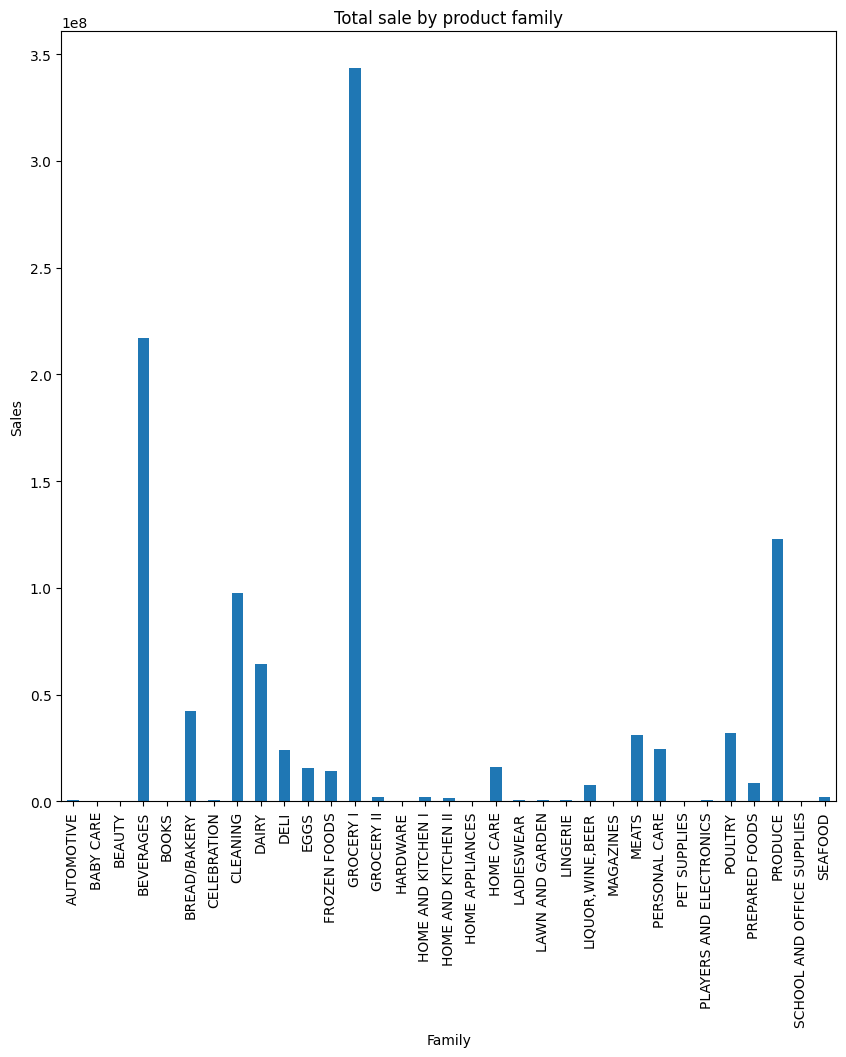

In [41]:
sales_by_family = df_merged.groupby('family').sales.sum()

plt.figure(figsize=(10,10))
sales_by_family.plot(kind='bar')
plt.title("Total sale by product family")
plt.xlabel("Family")
plt.ylabel("Sales")
plt.show()

# From the Family vs sales graph we see that Product family Grocery 1 has the hights sales.

In [42]:
# Explore the holidays data
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [43]:
train_holidays = pd.merge(df_train, df_holidays , on = 'date' , how = 'left')

In [44]:
train_holidays['type'].notna().sum()

502524

In [45]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [46]:
df_sample_sub

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [47]:
df_transactions.max()

date            2017-08-15
store_nbr               54
transactions          8359
dtype: object

In [48]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


Check for stationarity of data 

In [49]:
df = df_merged

In [50]:
from statsmodels.tsa.stattools import adfuller

# # Assuming df has 'date' and 'sales' columns and 'date' is in datetime format
# df['Year'] = df['date'].dt.year

# # Group by year and perform ADF test on each group
# for year, group in df.groupby('Year'):
#     group_sales = group['sales'].dropna()
#     result = adfuller(group_sales)
#     print(f'Year {year}: ADF Statistic: {result[0]}, p-value: {result[1]}')



In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:
df['sales'] = df['sales'].astype('float32')  # Use float32 instead of float64

In [53]:
df['Sales']= df['sales']

In [54]:
df['date'] = pd.to_datetime(df['date'])

In [69]:
# Filter data for the last two years
last_date = df['date'].max()
two_years_ago = last_date - pd.DateOffset(years=2)
df_last_two_years = df[df['date'] >= two_years_ago]




In [55]:
df.head()


,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
4,4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0


In [70]:
df_last_two_years.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
1700028,1700028,1700028,2015-08-15,1,AUTOMOTIVE,3.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,3.0
1700029,1700029,1700029,2015-08-15,1,BABY CARE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0
1700030,1700030,1700030,2015-08-15,1,BEAUTY,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0
1700031,1700031,1700031,2015-08-15,1,BEVERAGES,2845.0,5,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,2845.0
1700032,1700032,1700032,2015-08-15,1,BOOKS,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0


In [71]:
df_last_two_years.drop(columns="id", inplace=True)

df_last_two_years = df_last_two_years.drop(columns=['Unnamed: 0'])


C:\Users\sadha\AppData\Local\Temp\ipykernel_32756\4178272980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_two_years.drop(columns="id", inplace=True)


In [72]:
df_last_two_years['store_nbr'] = df_last_two_years['store_nbr'].astype('category')


In [73]:
df_last_two_years.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1300860 entries, 1700028 to 3000887
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date          1300860 non-null  datetime64[ns]
 1   store_nbr     1300860 non-null  category      
 2   family        1300860 non-null  object        
 3   sales         1300860 non-null  float32       
 4   onpromotion   1300860 non-null  int64         
 5   holiday_type  119394 non-null   object        
 6   dcoilwtico    896346 non-null   float64       
 7   city          1300860 non-null  object        
 8   state         1300860 non-null  object        
 9   store_type    1300860 non-null  object        
 10  cluster       1300860 non-null  int64         
 11  transactions  1265517 non-null  float64       
 12  year          1300860 non-null  int32         
 13  month         1300860 non-null  int32         
 14  dayofweek     1300860 non-null  int32         
 1

In [74]:
df_last_two_years.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
1700028,2015-08-15,1,AUTOMOTIVE,3.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,3.0
1700029,2015-08-15,1,BABY CARE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0
1700030,2015-08-15,1,BEAUTY,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0
1700031,2015-08-15,1,BEVERAGES,2845.0,5,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,2845.0
1700032,2015-08-15,1,BOOKS,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,1379.0,2015,8,5,0.0


<Figure size 1000x600 with 0 Axes>

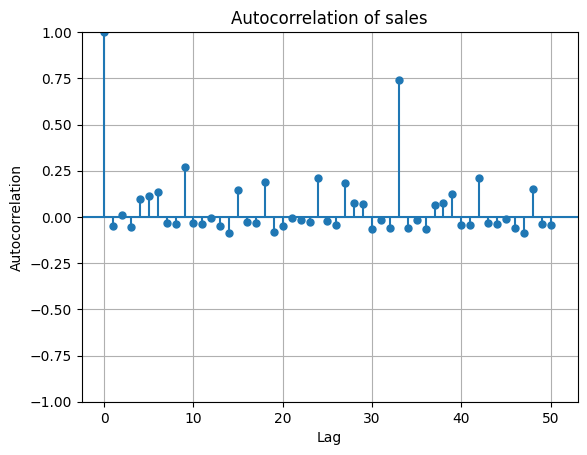

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Calculate and plot autocorrelation for 'Log_Sales'
plt.figure(figsize=(10, 6))
plot_acf(df_last_two_years['Sales'].dropna(), lags=50)  # Adjust 'lags' as needed
plt.title('Autocorrelation of sales')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

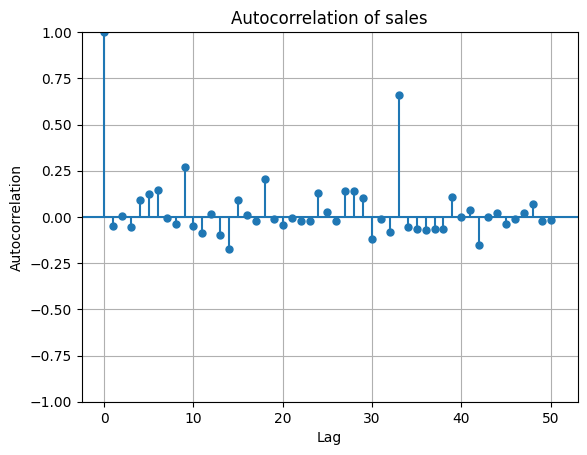

In [77]:

from statsmodels.graphics.tsaplots import plot_pacf


plt.figure(figsize=(10, 6))
plot_pacf(df_last_two_years['Sales'].dropna(), lags=50)  # Adjust 'lags' as needed
plt.title('Autocorrelation of sales')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [78]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is in a pandas DataFrame 'df' and the column of interest is 'sales'
# Replace 'df['sales']' with your time series data

sales_data = df_last_two_years['sales']  # Example column name

# Perform the ADF test
adf_result = adfuller(sales_data)

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


MemoryError: Unable to allocate 893. MiB for an array with shape (90, 1300730) and data type float64